(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.

[hint] opencv 의 cv2.addWeighted() 를 참고하세요.

Step 5. 문제점 찾아보기

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

    오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

        얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
        멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
        실행 속도가 중요할까요?
        스티커앱을 만들 때 정확도가 얼마나 중요할까요?



평가문항	상세기준

1. 자기만의 카메라앱 기능 구현을 완수하였다.
	원본에 스티커 사진이 정상적으로 합성되었다.

2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
	정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.

3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
	얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

In [1]:
# 이미지 처리를 위한 opencv와 이미지 출력을 위한 matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image1.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x640(1:1)의 크기로 Resize (원본 비율과 비슷하게)
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# dlib을 활용해 hog detector를 선언
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

#detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


68


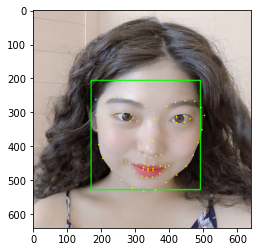

In [2]:
# 저장한 landmark 모델을 불러옵니다.
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 랜드마크 영상 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [3]:
# 좌표확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('코 위치 (x,y) : (%d,%d)'%(x,y))
    print ('landmark의 크기 (w,h) : (%d,%d)'%(w,h))
    
# # 좌표확인
# for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
#     print (landmark[2]) # lft cheek index : 30
#     x = landmark[2][0]
#     y = landmark[2][1]
#     w = dlib_rect.width()
#     h = dlib_rect.width()
#     print ('왼쪽 볼 (x,y) : (%d,%d)'%(x,y))
#     print ('landmark의 크기 (w,h) : (%d,%d)'%(w,h))

(347, 415)
코 위치 (x,y) : (347,415)
landmark의 크기 (w,h) : (322,322)


(512, 512, 3)
(322, 322, 3)
스티커의 (left, top)가 될 (x,y) : (186,286)
(286, 322, 3)


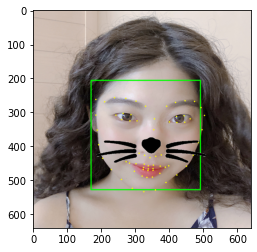

In [4]:
#스티커 읽어오기
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
print (img_sticker.shape)
# 스티커 resize
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape)

refined_x = x - w//2 # left
refined_y = y - round(h*0.4) # top
print ('스티커의 (left, top)가 될 (x,y) : (%d,%d)'%(refined_x, refined_y))

# 사진 밖으로 나가는 건 crop하기
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

# 음수가 아닐 때
# refined_y:refined_y+img_sticker.shape[0]
# print (img_sticker.shape)

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

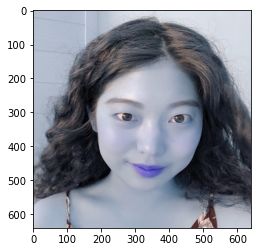

In [5]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()